<a href="https://colab.research.google.com/github/Skannan03/imarticus_project/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HEART DISEASE PREDICTION

#Importing the libraries

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Importing the dataset


In [2]:
df=pd.read_csv("/content/HeartDisease.csv")
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.skew()

age                   -0.202463
gender                -0.791335
chest_pain             0.484732
rest_bps               0.713768
cholestrol             1.143401
fasting_blood_sugar    1.986652
rest_ecg               0.162522
thalach               -0.537410
exer_angina            0.742532
old_peak               1.269720
slope                 -0.508316
ca                     1.310422
thalassemia           -0.476722
target                -0.179821
dtype: float64

In [6]:
df.corr()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Univariate analysis

<Axes: ylabel='target'>

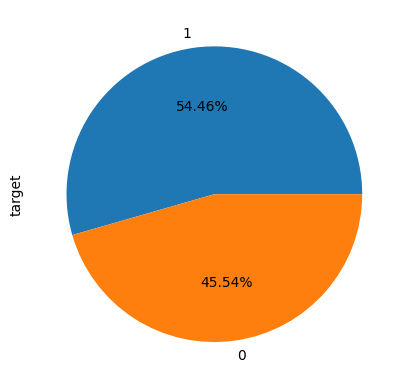

In [26]:
df['target'].value_counts().plot(kind='pie',autopct='%1.2f%%')

<Axes: >

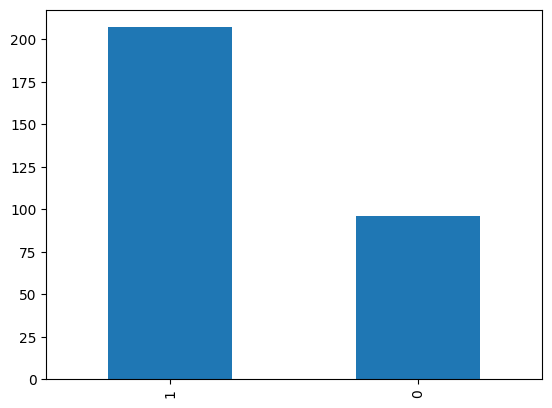

In [7]:
df['gender'].value_counts().plot(kind='bar')

<Axes: >

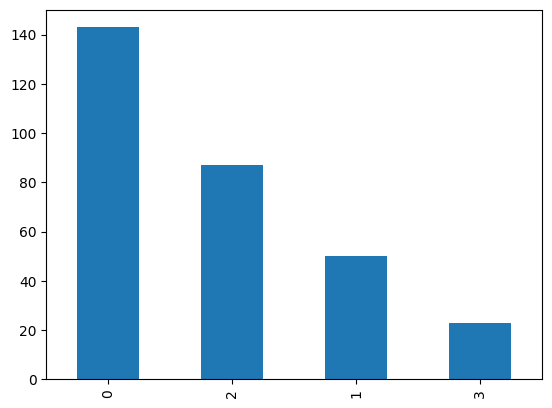

In [8]:
df['chest_pain'].value_counts().plot(kind='bar')

<Axes: >

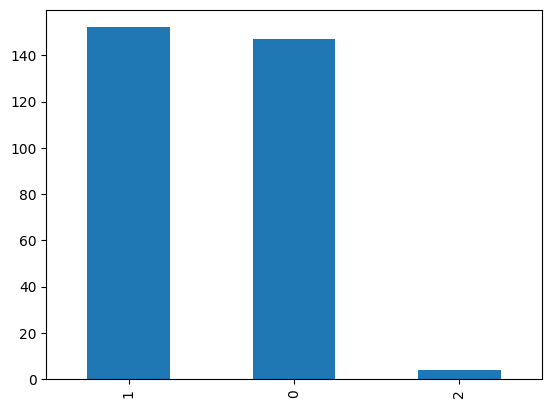

In [9]:
df['rest_ecg'].value_counts().plot(kind='bar')

<Axes: >

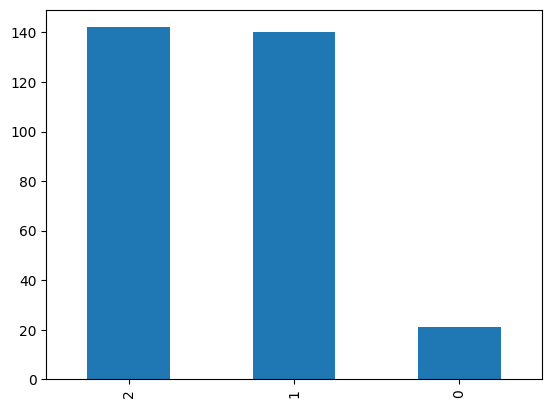

In [10]:
 df['slope'].value_counts().plot(kind='bar')

<Axes: >

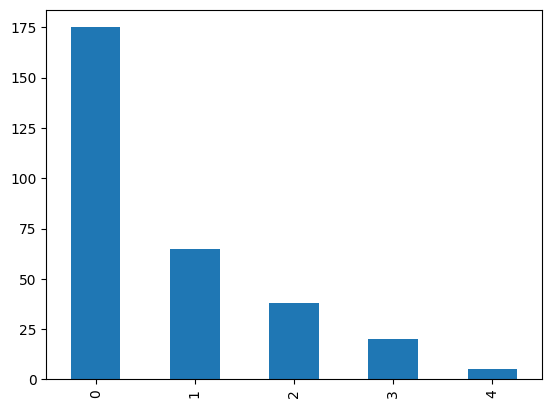

In [11]:
 df['ca'].value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

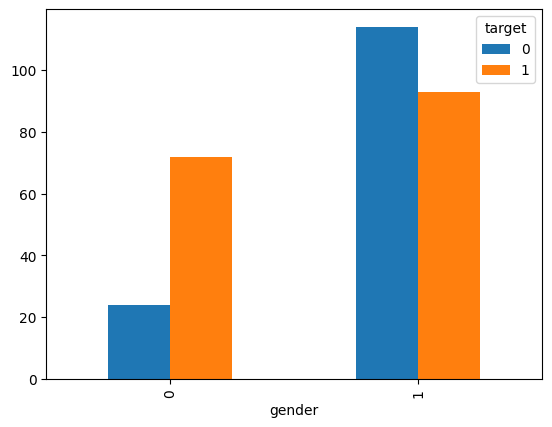

In [12]:
pd.crosstab(df.gender,df.target).plot(kind="bar")

<Axes: xlabel='chest_pain'>

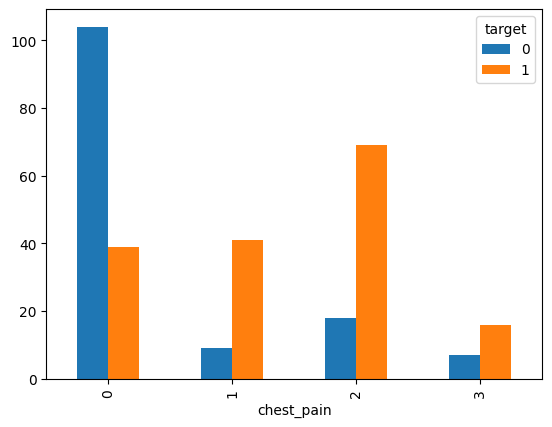

In [13]:
pd.crosstab(df.chest_pain,df.target).plot(kind="bar")

<Axes: >

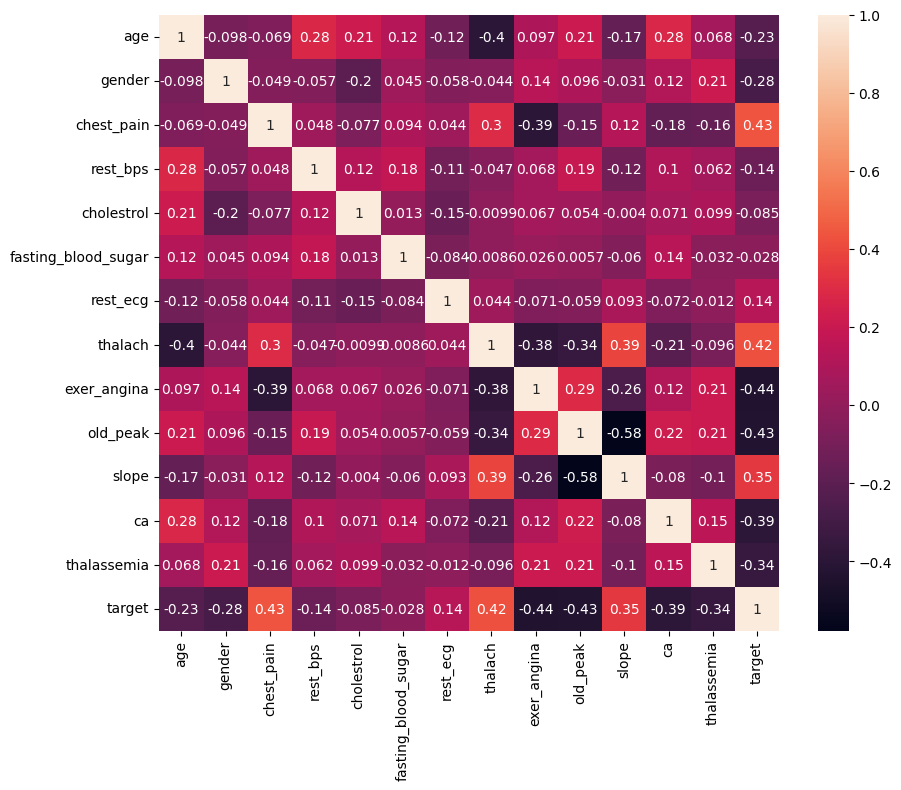

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)


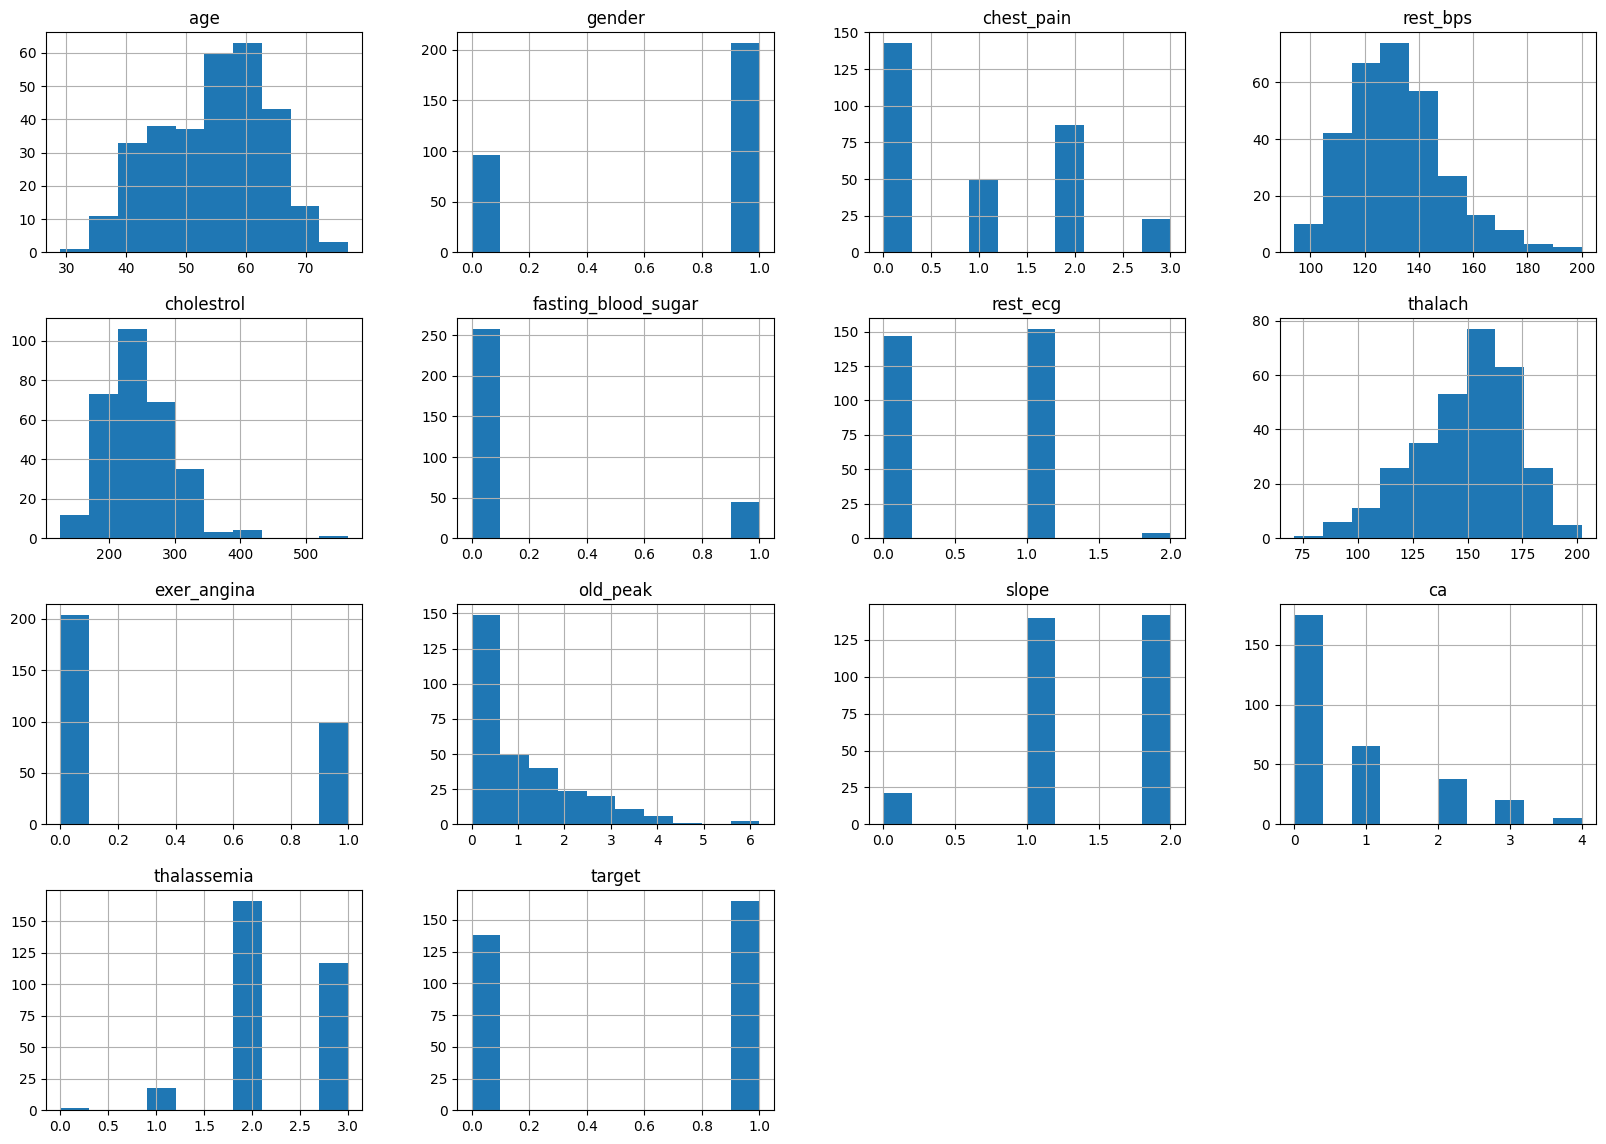

In [30]:
df.hist(figsize = (20,14))
plt.show()

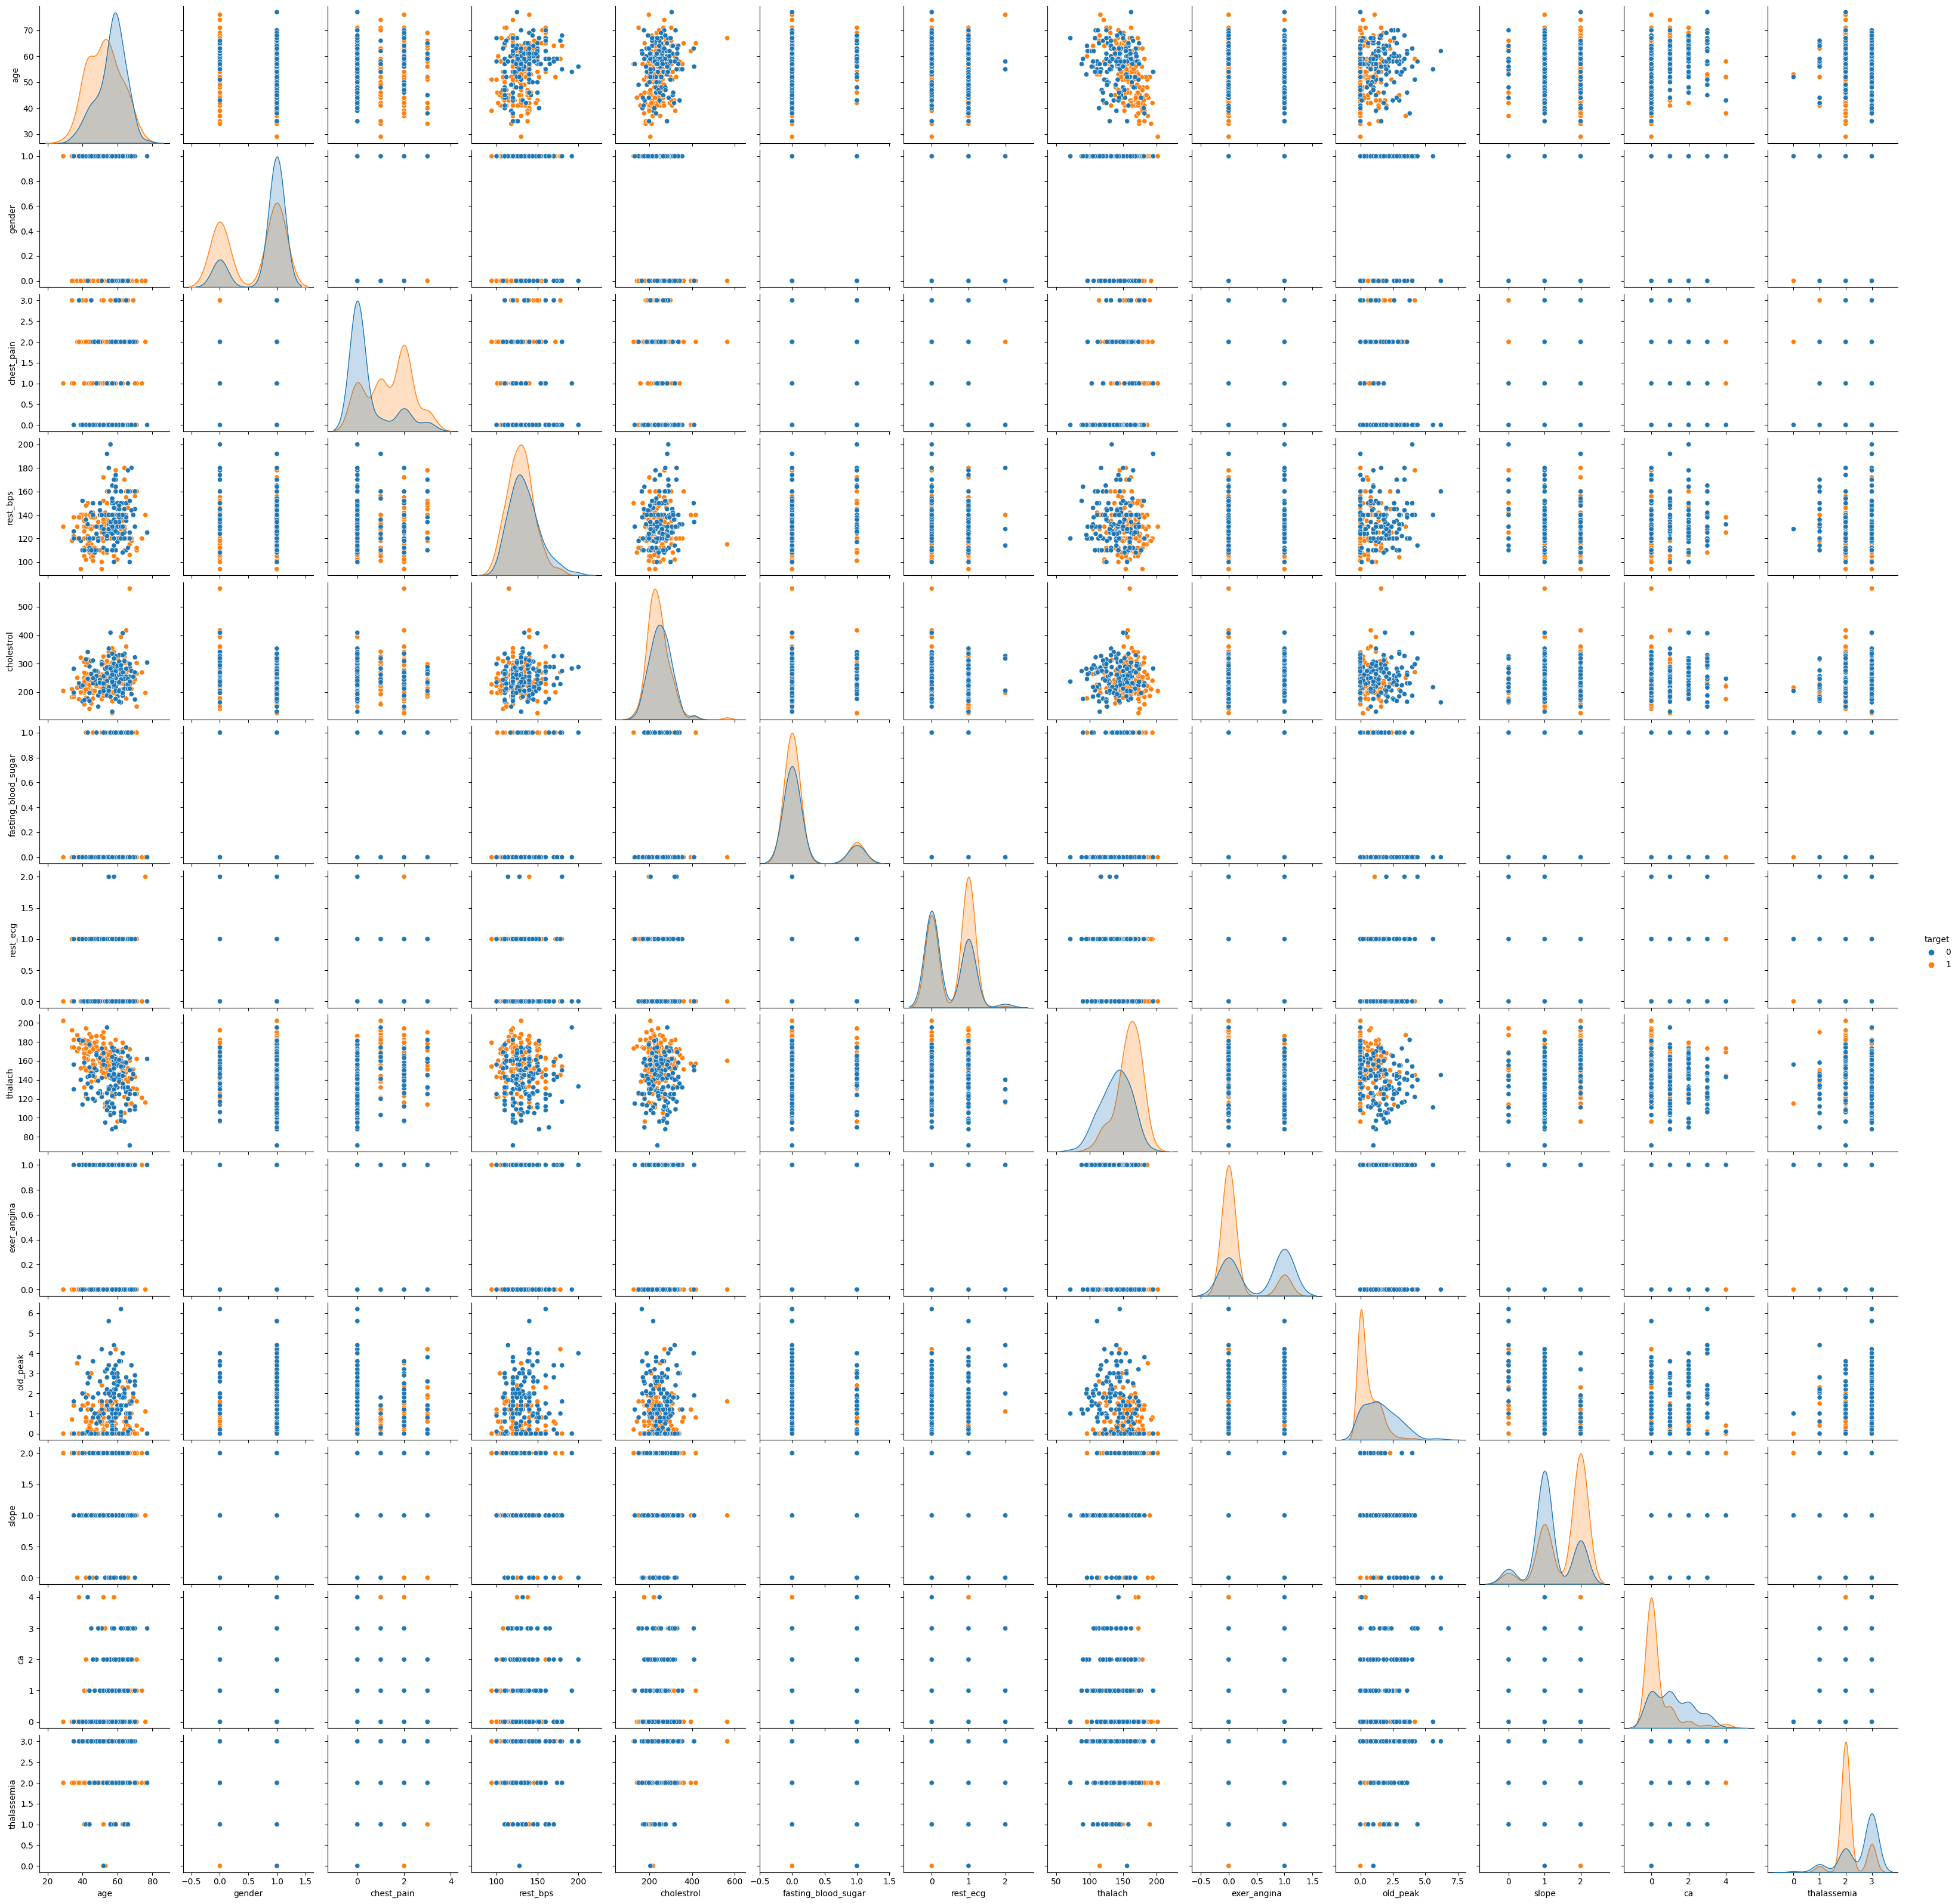

In [33]:
sns.pairplot(df,hue='target')

#Train Test Split


In [52]:
x=df.drop(["target"],axis=1)
y=df['target']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_scal=scalar.fit_transform(x_train)
x_test_scal=scalar.fit_transform(x_test)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(242, 13)
(61, 13)
(61,)
(242,)


#Logistic Regression


In [46]:
lr=LogisticRegression()
lr.fit(x_train_scal,y_train)
preds_ytrain_lr=lr.predict(x_train_scal)
preds_ytest_lr=lr.predict(x_test_scal)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score)
   print('confusion matrix::',cn_matrix)
   print('classification report::',cla_report)
acc_report(y_test,preds_ytest_lr)
print("::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")
acc_report(y_train,preds_ytrain_lr)

accuracy:: 0.7704918032786885
confusion matrix:: [[24  6]
 [ 8 23]]
classification report::               precision    recall  f1-score   support

           0       0.75      0.80      0.77        30
           1       0.79      0.74      0.77        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
accuracy:: 0.8925619834710744
confusion matrix:: [[ 88  20]
 [  6 128]]
classification report::               precision    recall  f1-score   support

           0       0.94      0.81      0.87       108
           1       0.86      0.96      0.91       134

    accuracy                           0.89       242
   macro avg       0.90      0.89      0.89       242
weighted avg       0.90      0.89      0.89       242



#Decision Tree


In [64]:
dtree=DecisionTreeClassifier(max_depth=3,min_samples_split=2)
dtree.fit(x_train_scal,y_train)
preds_dtree_train=dtree.predict(x_train_scal)
preds_dtree_test=dtree.predict(x_test_scal)
acc_report(y_train,preds_dtree_train)
acc_report(y_test,preds_dtree_test)

accuracy:: 0.8801652892561983
confusion matrix:: [[ 84  24]
 [  5 129]]
classification report::               precision    recall  f1-score   support

           0       0.94      0.78      0.85       108
           1       0.84      0.96      0.90       134

    accuracy                           0.88       242
   macro avg       0.89      0.87      0.88       242
weighted avg       0.89      0.88      0.88       242

accuracy:: 0.7213114754098361
confusion matrix:: [[18 12]
 [ 5 26]]
classification report::               precision    recall  f1-score   support

           0       0.78      0.60      0.68        30
           1       0.68      0.84      0.75        31

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



#Random forest classifier


In [115]:
rf = RandomForestClassifier(random_state=0,min_samples_split=2)
rf.fit(x_train_scal, y_train)
preds_rf_train=rf.predict(x_train_scal)
preds_rf_test=rf.predict(x_test_scal)
acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

accuracy:: 1.0
confusion matrix:: [[108   0]
 [  0 134]]
classification report::               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       134

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

accuracy:: 0.7704918032786885
confusion matrix:: [[20 10]
 [ 4 27]]
classification report::               precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



#Extreme Gradient Boosting

In [77]:

xgb=XGBClassifier()
xgb.fit(x_train_scal,y_train)
preds_xgb_train=xgb.predict(x_train_scal)
preds_xgb_test=xgb.predict(x_test_scal)
acc_report(y_train,preds_xgb_train)
acc_report(y_test,preds_xgb_test)

accuracy:: 1.0
confusion matrix:: [[108   0]
 [  0 134]]
classification report::               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       134

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

accuracy:: 0.7377049180327869
confusion matrix:: [[20 10]
 [ 6 25]]
classification report::               precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



#Gradient Boosting

In [113]:

gb=GradientBoostingClassifier(n_estimators=300)
gb.fit(x_train_scal,y_train)
preds_gb_train=gb.predict(x_train_scal)
preds_gb_test=gb.predict(x_test_scal)
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

accuracy:: 1.0
confusion matrix:: [[108   0]
 [  0 134]]
classification report::               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       134

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

accuracy:: 0.7540983606557377
confusion matrix:: [[20 10]
 [ 5 26]]
classification report::               precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [66]:
np.sqrt(303)

17.406895185529212

#knn


In [111]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train_scal,y_train)
preds_ytrain_knn=knn.predict(x_train_scal)
preds_ytest_knn=knn.predict(x_test_scal)
acc_report(y_train,preds_ytrain_knn)
acc_report(y_test,preds_ytest_knn)


accuracy:: 0.8677685950413223
confusion matrix:: [[ 84  24]
 [  8 126]]
classification report::               precision    recall  f1-score   support

           0       0.91      0.78      0.84       108
           1       0.84      0.94      0.89       134

    accuracy                           0.87       242
   macro avg       0.88      0.86      0.86       242
weighted avg       0.87      0.87      0.87       242

accuracy:: 0.7704918032786885
confusion matrix:: [[19 11]
 [ 3 28]]
classification report::               precision    recall  f1-score   support

           0       0.86      0.63      0.73        30
           1       0.72      0.90      0.80        31

    accuracy                           0.77        61
   macro avg       0.79      0.77      0.77        61
weighted avg       0.79      0.77      0.77        61



#AdaBoosting

In [101]:
ada=AdaBoostClassifier(n_estimators=200,learning_rate=1.0)
ada.fit(x_train_scal,y_train)
preds_ada_train=ada.predict(x_train_scal)
preds_ada_test=ada.predict(x_test_scal)
acc_report(y_train,preds_ada_train)
acc_report(y_test,preds_ada_test)

accuracy:: 0.9958677685950413
confusion matrix:: [[107   1]
 [  0 134]]
classification report::               precision    recall  f1-score   support

           0       1.00      0.99      1.00       108
           1       0.99      1.00      1.00       134

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

accuracy:: 0.7704918032786885
confusion matrix:: [[24  6]
 [ 8 23]]
classification report::               precision    recall  f1-score   support

           0       0.75      0.80      0.77        30
           1       0.79      0.74      0.77        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



#Support Vector Machine

In [105]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train_scal,y_train)
svc_preds_train=svc.predict(x_train_scal)
svc_preds_test=svc.predict(x_test_scal)
acc_report(y_train,svc_preds_train)
acc_report(y_test,svc_preds_test)

accuracy:: 0.8801652892561983
confusion matrix:: [[ 84  24]
 [  5 129]]
classification report::               precision    recall  f1-score   support

           0       0.94      0.78      0.85       108
           1       0.84      0.96      0.90       134

    accuracy                           0.88       242
   macro avg       0.89      0.87      0.88       242
weighted avg       0.89      0.88      0.88       242

accuracy:: 0.7540983606557377
confusion matrix:: [[21  9]
 [ 6 25]]
classification report::               precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



#Gaussian Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_scal,y_train)
gb_preds_train=gb.predict(x_train_scal)
gb_preds_test=gb.predict(x_test_scal)
acc_report(y_train,gb_preds_train)
acc_report(y_test,gb_preds_test)

accuracy:: 0.8553719008264463
confusion matrix:: [[ 86  22]
 [ 13 121]]
classification report::               precision    recall  f1-score   support

           0       0.87      0.80      0.83       108
           1       0.85      0.90      0.87       134

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242

accuracy:: 0.7868852459016393
confusion matrix:: [[22  8]
 [ 5 26]]
classification report::               precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.76      0.84      0.80        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



#Accuracy Scores
>Logistic Regression=0.77

>Decision Tree=0.72

>Random Forest=0.77

>Gradient boosting=0.75

>XGradient Boosting=0.73

>KNN=0.77

>AdaBoosting=0.78

>SVM=0.75

>Gaussian Naive Bayes=0.78

>The AdaBoosting and GaussianNB performs best on this dataset  

